In [190]:
import numpy as np
import matplotlib.pyplot as plot
import math

In [191]:
def get_wave(time, wave_func, decay, attack, sustain, overtones = 1, overtones_dist = [], root_freq=440):
    # Get the wave shape
    amplitude = np.zeros(time.shape);
    amplitude = wave_func(amplitude, time, overtones, overtones_dist, root_freq);
    # Apply the modifiers
    for i in range(len(amplitude)):
        if (time[i] < attack):
            amplitude[i] *= (time[i] / attack) ** 2
        if (time[i] > sustain):
            amplitude[i] *= math.exp(-decay * (time[i] - sustain))
    return amplitude;

In [192]:
def sin_wave(amplitude, time, overtones = 1, overtones_dist = [], root_freq=440):
    for overtone in range(overtones):
        volume = overtones_dist[overtone] if overtone < len(overtones_dist) else math.exp(-overtone);
        freq = root_freq * (overtone + 1);
        for i in range(len(amplitude)):
            amplitude[i] += volume * math.sin( time[i] * freq * 2 * math.pi);
    return amplitude;

In [193]:
def sqr_wave(amplitude, time, overtones = 1, overtones_dist = [], root_freq=440):
    for overtone in range(overtones):
        volume = overtones_dist[overtone] if overtone < len(overtones_dist) else math.exp(-overtone);
        freq = root_freq * (overtone + 1);
        period = 1 / freq;
        for i in range(len(amplitude)):
            amplitude[i] += volume if time[i] % period < (period / 2) else -volume;
    return amplitude;

In [194]:
def tri_wave(amplitude, time, overtones = 1, overtones_dist = [], root_freq=440):
    # Get the wave shape
    for overtone in range(overtones):
        volume = overtones_dist[overtone] if overtone < len(overtones_dist) else math.exp(-overtone);
        freq = root_freq * (overtone + 1);
        period = 1 / freq;
        for i in range(len(amplitude)):
            factor = (time[i] % (period / 2)) / (period / 2) 
            amplitude[i] += 2 * volume * factor - volume;
            amplitude[i] *= 1 if time[i] % period < (period / 2) else -1;
    return amplitude;

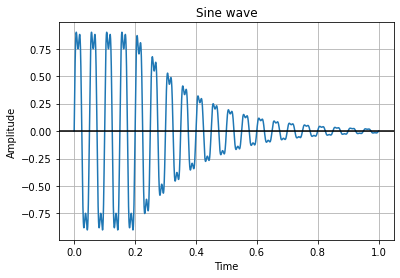

In [201]:
# time = np.arange(0, 0.05, 0.0000005);
time = np.arange(0, 1, 0.00001);

# decay_range = np.arange(0.05, 5, 0.05)
amplitude = get_wave(time,
                     wave_func = sin_wave,
                     decay = 5, 
                     attack = 0, 
                     sustain = 0.2, 
                     overtones = 3, 
                     overtones_dist = [1, 0.01, 0.25, 0.7],
                     root_freq=1/0.05
                    );

# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(time, amplitude)

# Give a title for the sine wave plot
plot.title('Sine wave')

# Give x axis label for the sine wave plot
plot.xlabel('Time')

# Give y axis label for the sine wave plot
plot.ylabel('Amplitude')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()